In [1]:
import pandas as pd

# Load the datasets
train_df = pd.read_csv('datasets/train.csv')
test_df = pd.read_csv('datasets/test.csv')

# Display the first few rows of each dataset to understand their structure
train_head = train_df.head()
test_head = test_df.head()

train_head, test_head


(   PassengerId  Survived  Pclass  \
 0            1         0       3   
 1            2         1       1   
 2            3         1       3   
 3            4         1       1   
 4            5         0       3   
 
                                                 Name     Sex   Age  SibSp  \
 0                            Braund, Mr. Owen Harris    male  22.0      1   
 1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                             Heikkinen, Miss. Laina  female  26.0      0   
 3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                           Allen, Mr. William Henry    male  35.0      0   
 
    Parch            Ticket     Fare Cabin Embarked  
 0      0         A/5 21171   7.2500   NaN        S  
 1      0          PC 17599  71.2833   C85        C  
 2      0  STON/O2. 3101282   7.9250   NaN        S  
 3      0            113803  53.1000  C123        S  
 4      0            373450   8.0500

In [2]:
# Checking the number of data points (rows) in each dataset
train_data_points = train_df.shape[0]
test_data_points = test_df.shape[0]

train_data_points, test_data_points


(891, 418)

In [3]:
# Checking for missing values in both datasets
missing_values_train = train_df.isnull().sum()
missing_values_test = test_df.isnull().sum()

missing_values_train, missing_values_test


(PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 Age            177
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          687
 Embarked         2
 dtype: int64,
 PassengerId      0
 Pclass           0
 Name             0
 Sex              0
 Age             86
 SibSp            0
 Parch            0
 Ticket           0
 Fare             1
 Cabin          327
 Embarked         0
 dtype: int64)

In [4]:
# Imputing Age with median value
median_age_train = train_df['Age'].median()
median_age_test = test_df['Age'].median()
train_df['Age'].fillna(median_age_train, inplace=True)
test_df['Age'].fillna(median_age_test, inplace=True)

# Imputing Embarked with the mode (most frequent value)
mode_embarked_train = train_df['Embarked'].mode()[0]
train_df['Embarked'].fillna(mode_embarked_train, inplace=True)

# Imputing Fare in test dataset with median value
median_fare_test = test_df['Fare'].median()
test_df['Fare'].fillna(median_fare_test, inplace=True)

# Dropping the Cabin feature due to a high percentage of missing values
train_df.drop('Cabin', axis=1, inplace=True)
test_df.drop('Cabin', axis=1, inplace=True)

# Checking for missing values again after imputation
remaining_missing_values_train = train_df.isnull().sum()
remaining_missing_values_test = test_df.isnull().sum()

remaining_missing_values_train, remaining_missing_values_test


(PassengerId    0
 Survived       0
 Pclass         0
 Name           0
 Sex            0
 Age            0
 SibSp          0
 Parch          0
 Ticket         0
 Fare           0
 Embarked       0
 dtype: int64,
 PassengerId    0
 Pclass         0
 Name           0
 Sex            0
 Age            0
 SibSp          0
 Parch          0
 Ticket         0
 Fare           0
 Embarked       0
 dtype: int64)

**Approach to Imputation:**
1. **Age**: 
   - The 'Age' feature had 177 missing values in the training set and 86 in the testing set.
   - Given the importance of age in survival analysis, we imputed these missing values with the median age.
   - Using the median (as opposed to the mean) is a standard practice since it is less sensitive to outliers, which is particularly useful in age data.

2. **Embarked**:
   - Only 2 missing values in the 'Embarked' field in the training set.
   - These were imputed with the mode (most frequent value) of the 'Embarked' column.
   - The mode is chosen because 'Embarked' is a categorical variable, and using the most common category is a reasonable approach to fill in the gaps.

3. **Fare**:
   - The testing set had 1 missing value in the 'Fare' field.
   - This was imputed using the median value of the 'Fare' column in the testing set.
   - The median is preferable here as 'Fare' can vary significantly, and the median provides a central tendency that is robust against large variations in fare prices.

4. **Cabin**:
   - A significant number of missing values (687 in the training set and 327 in the testing set) were present in the 'Cabin' column.
   - Due to the high percentage of missing data, the 'Cabin' feature was dropped from both datasets.
   - Retaining a feature with such a large number of missing values could introduce bias and inaccuracies in the model.

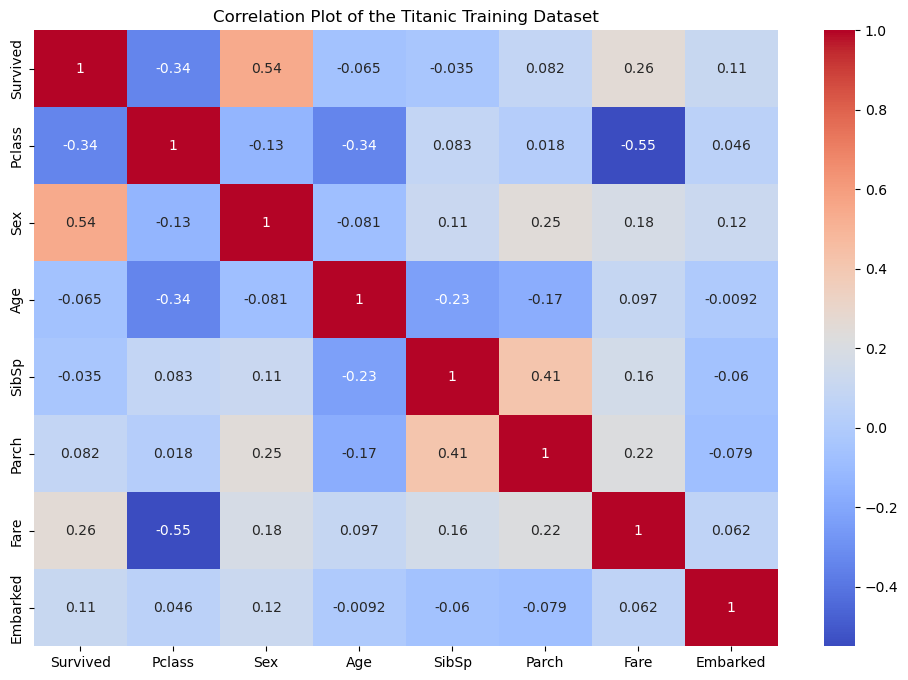

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Dropping the 'Name' and 'PassengerId' columns
train_df = train_df.drop(['Name', 'PassengerId','Ticket'], axis=1)
test_df= test_df.drop(['Name','Ticket'], axis=1)

# Converting 'Sex' and 'Embarked' to numerical values
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})
train_df['Embarked'] = train_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
test_df['Sex'] = test_df['Sex'].map({'male': 0, 'female': 1})
test_df['Embarked'] = test_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Creating the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Plot of the Titanic Training Dataset")
plt.show()

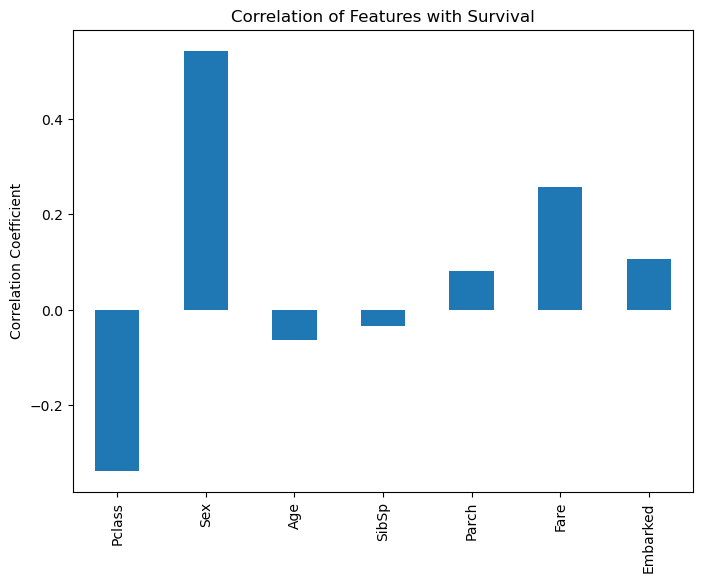

In [6]:
# Calculating correlations with 'Survived'
correlations = train_df.corr()['Survived'].drop('Survived')  # Exclude self-correlation

# Plotting the histogram
plt.figure(figsize=(8, 6))
correlations.plot(kind='bar')
plt.title('Correlation of Features with Survival')
plt.ylabel('Correlation Coefficient')
plt.show()

**Analysis of Feature Correlation with Survival:**

- **Pclass**: The negative correlation coefficient suggests that as Pclass increases (where 1st class is coded as 1, and 3rd class is coded as 3), the likelihood of survival decreases. Passengers in higher classes (which are numerically lower) were more likely to survive.

- **Sex**: There is a strong positive correlation with survival, indicating that females (coded as 1) had a much higher chance of surviving than males (coded as 0). This is consistent with historical reports that women were given priority for lifeboats.

- **Age**: The slight negative correlation suggests that younger passengers had a slightly higher chance of survival, but this relationship is not as strong as other variables.

- **SibSp**: This feature shows a very weak negative correlation, implying that passengers with fewer siblings or spouses aboard might have had a marginally higher chance of survival.

- **Parch**: The positive correlation is more noticeable than SibSp, suggesting that passengers with parents or children aboard had a slightly higher survival rate. This may reflect priority in evacuation procedures for families.

- **Fare**: Reflecting a moderate positive correlation, indicating that passengers who paid higher fares, which often correlates with higher Pclass, had better chances of survival.

- **Embarked**: This variable shows a small positive correlation. This could be due to passengers embarking at different ports having different survival rates, possibly related to socioeconomic factors and the proportion of passengers in different classes.

**Conclusions:**

- The most influential factors on survival appear to be Sex and Pclass, as indicated by the correlation coefficients. This suggests that gender and socioeconomic status played significant roles in survival on the Titanic.
- Age, Fare, Parch and Embarked also show some level of correlation, suggesting that age, fare paid, and having family aboard were factors in the likelihood of survival.
- SibSp show weaker correlations, suggesting that this factor had a lesser impact on survival compared to others.

In [7]:
# Dropping the 'SibSp' column
train_df.drop('SibSp', axis=1, inplace=True)
test_df.drop('SibSp', axis=1, inplace=True)

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Selecting the features for modeling and the target variable
features = ['Pclass', 'Sex', 'Age', 'Parch', 'Fare', 'Embarked']
X = train_df[features]
y = train_df['Survived']

# Normalize the feature data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_normalized, y, test_size=0.3, random_state=42)

# Initialize the Logistic Regression and Random Forest models
logreg = LogisticRegression()
random_forest = RandomForestClassifier(n_estimators=100)

# Train the Logistic Regression model
logreg.fit(X_train, y_train)

# Train the Random Forest Classifier model
random_forest.fit(X_train, y_train)

# Evaluate the Logistic Regression model
logreg_pred = logreg.predict(X_val)
print("Logistic Regression model evaluation:")
print(classification_report(y_val, logreg_pred))

# Evaluate the Random Forest Classifier model
random_forest_pred = random_forest.predict(X_val)
print("Random Forest Classifier model evaluation:")
print(classification_report(y_val, random_forest_pred))

# Normalize the test data features
X_test = test_df[features]
X_test_normalized = scaler.transform(X_test)

# Make predictions on the normalized test data
test_predictions_logreg = logreg.predict(X_test_normalized)
test_predictions_random_forest = random_forest.predict(X_test_normalized)

# Prepare the submission dataframe for Logistic Regression
submission_logreg = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': test_predictions_logreg
})

# Prepare the submission dataframe for Random Forest
submission_random_forest = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': test_predictions_random_forest
})

# Save the submission files
submission_logreg.to_csv('submission_logreg.csv', index=False)
submission_random_forest.to_csv('submission_random_forest.csv', index=False)


Logistic Regression model evaluation:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       157
           1       0.77      0.72      0.74       111

    accuracy                           0.79       268
   macro avg       0.79      0.78      0.79       268
weighted avg       0.79      0.79      0.79       268

Random Forest Classifier model evaluation:
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       157
           1       0.75      0.68      0.71       111

    accuracy                           0.77       268
   macro avg       0.77      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268



**Model Training and Evaluation**
- Both Logistic Regression and Random Forest models were trained on normalized feature data. Normalization is crucial as it scales the feature values to a standard range and can lead to improved model performance.
- The data was split into training and validation sets with 70% used for training and 30% for validation.

**Logistic Regression Model**
- The model achieved an accuracy of 79%, with precision scores of 81% for class 0 (did not survive) and 77% for class 1 (survived). This suggests the model is relatively balanced in its prediction capabilities for both classes.

**Random Forest Classifier Model**
- This model has an accuracy of 77%, slightly less than the Logistic Regression model.
- The precision and recall scores for the Random Forest model are also slightly lower than those for the Logistic Regression model. This could suggest that the Random Forest model may be overfitting to the training data or not capturing the underlying patterns as well.

**Overall Analysis**
- The choice of Logistic Regression seems to be slightly more effective for this dataset based on the evaluation metrics provided. This could be due to its ability to provide a robust linear boundary for classification in this context.